In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data_path = "./toy_dataset.csv"
df = pd.read_csv(data_path)
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No



# Explorative Analysis


<br>
We will drop Number column as it doesn't provide us any useful data.

In [3]:
df = df.drop('Number', axis=1)
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   City     150000 non-null  object 
 1   Gender   150000 non-null  object 
 2   Age      150000 non-null  int64  
 3   Income   150000 non-null  float64
 4   Illness  150000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.7+ MB


In [4]:
df.describe()

,Age,Income
count,150000.000000,150000.000000
mean,44.950200,91252.798273
std,11.572486,24989.500948
min,25.000000,-654.000000
25%,35.000000,80867.750000
50%,45.000000,93655.000000
75%,55.000000,104519.000000
max,65.000000,177157.000000


Minimum income negative?
<br>
<br>
<br>

In [5]:
df[df.Income < 0]

,City,Gender,Age,Income,Illness
245,Dallas,Female,40,-654.0,Yes


There is only one negative income entry so it is probably a mistake. We can delete it.
<br>
<br>


In [6]:
df = df.drop(df[df.Income < 0].index)
df.Income.describe()

count    149999.000000
mean      91253.410989
std       24988.457482
min         584.000000
25%       80868.000000
50%       93655.000000
75%      104519.000000
max      177157.000000
Name: Income, dtype: float64

In [7]:
df.isnull().sum()

City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

There are no null values in our data so we don't have to fill it.

In [8]:
df.City.unique()

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

## Distribution plots
<br>


In [9]:
rcParams['figure.figsize'] = (10, 5)

<AxesSubplot:xlabel='count', ylabel='City'>

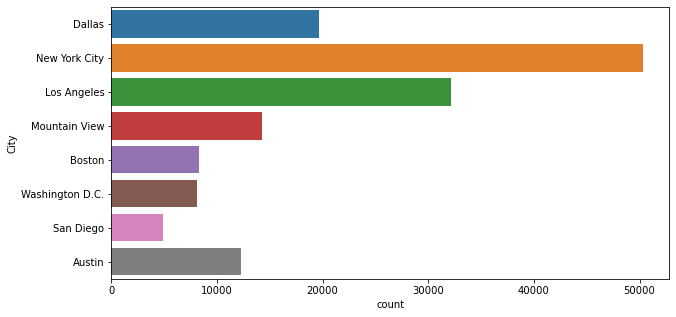

In [10]:
sns.countplot(y="City", data=df);

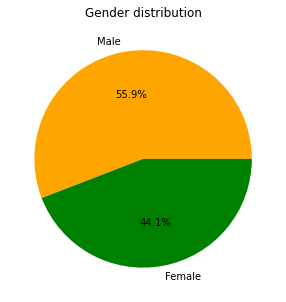

In [11]:
gender_numbers = df['Gender'].value_counts()
plt.pie(gender_numbers.values, labels=gender_numbers.index, autopct='%1.1f%%', colors=["orange", "green"])
plt.title("Gender distribution")
plt.show()

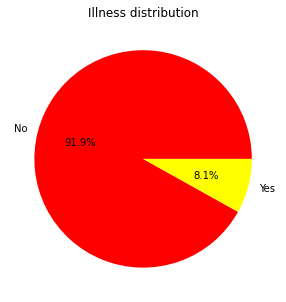

In [12]:
illness_numbers = df['Illness'].value_counts()
plt.pie(illness_numbers.values, labels=illness_numbers.index, autopct='%1.1f%%', colors=["red", "yellow"])
plt.title("Illness distribution")
plt.show()

Data is imbalanced.

<AxesSubplot:xlabel='Age', ylabel='Count'>

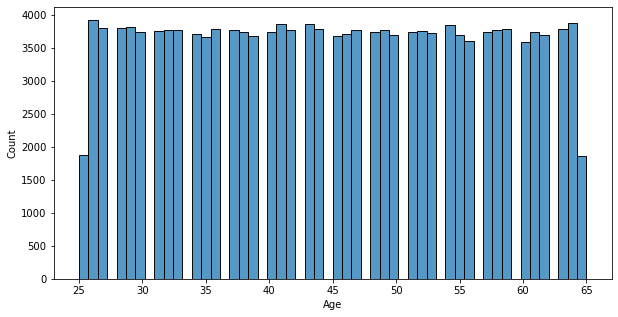

In [13]:
sns.histplot(df["Age"]);

<AxesSubplot:xlabel='Income', ylabel='Count'>

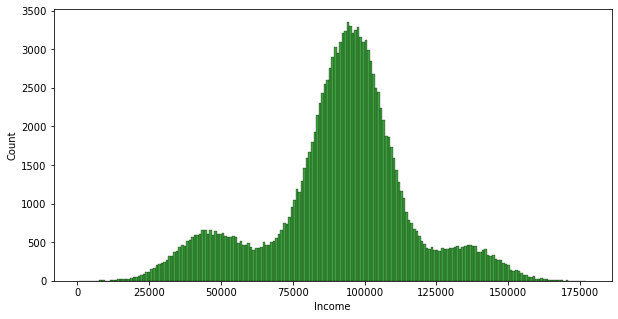

In [14]:
sns.histplot(df["Income"], color="green");

## Percentages based on illness
<br>

<AxesSubplot:title={'center':'Gender - Illness'}, xlabel='Gender', ylabel='Probability'>

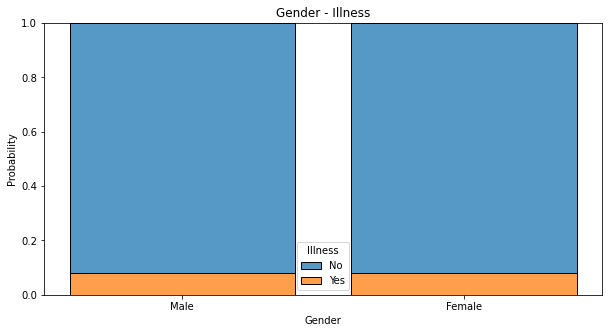

In [15]:
plt.title("Gender - Illness")
sns.histplot(df, x="Gender", hue="Illness", stat="probability", multiple="fill", shrink=.8);

<AxesSubplot:title={'center':'City - Illness'}, xlabel='City', ylabel='Probability'>

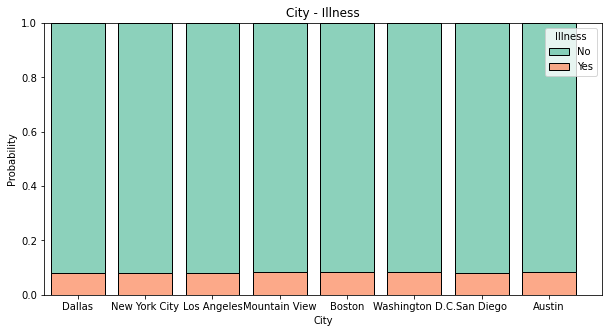

In [16]:
plt.title("City - Illness")
sns.histplot(df, x="City", hue="Illness", stat="probability", multiple="fill", shrink=.8, palette="Set2");

<AxesSubplot:title={'center':'Age - Illness'}, xlabel='Age', ylabel='Probability'>

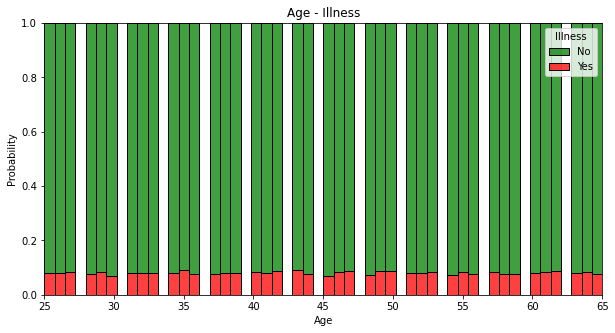

In [17]:
plt.title("Age - Illness")
sns.histplot(df, x="Age", hue="Illness", stat="probability", multiple="fill", palette=["green", "red"]);

<AxesSubplot:title={'center':'Income - Illness'}, xlabel='Income', ylabel='Probability'>

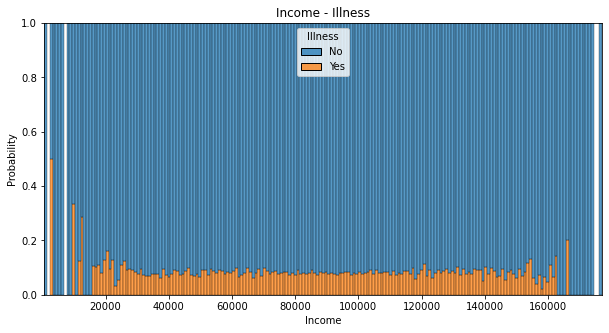

In [18]:
plt.title("Income - Illness")
sns.histplot(df, x="Income", hue="Illness", stat="probability", multiple="fill");

Everything is fairly evenly distributed except Illness at low and high Income extremes. That is expected because of scarce data at the extremes.

## Other joint distributions

<AxesSubplot:title={'center':'Age - Income - Illness'}, xlabel='Age', ylabel='Income'>

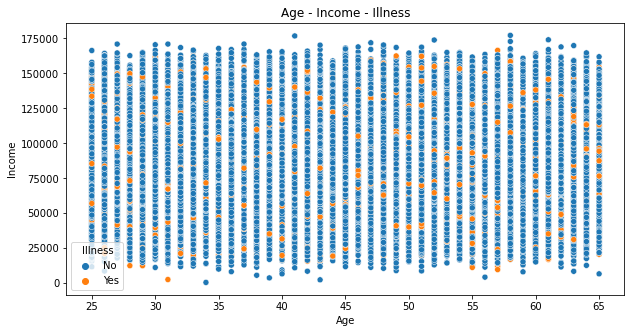

In [19]:
plt.title("Age - Income - Illness")
sns.scatterplot(x="Age", y="Income", hue="Illness", data=df);

Income over age is pretty evenly distributed with no extreme outliers by the first look. Illness over age and income seems random.

<AxesSubplot:title={'center':'Income - Gender'}, xlabel='Income', ylabel='Count'>

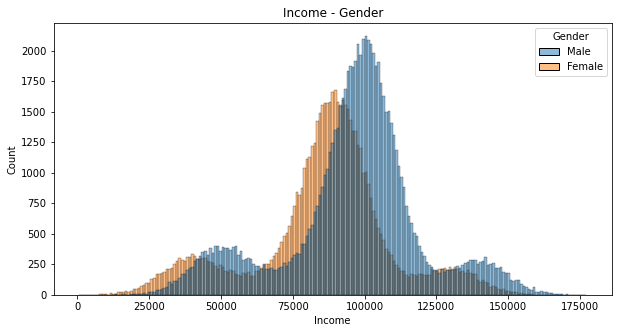

In [20]:
plt.title("Income - Gender")
sns.histplot(x="Income", hue="Gender", data=df);

We see that men generally have a bit higher income.

<AxesSubplot:title={'center':'Income - City'}, xlabel='City', ylabel='Income'>

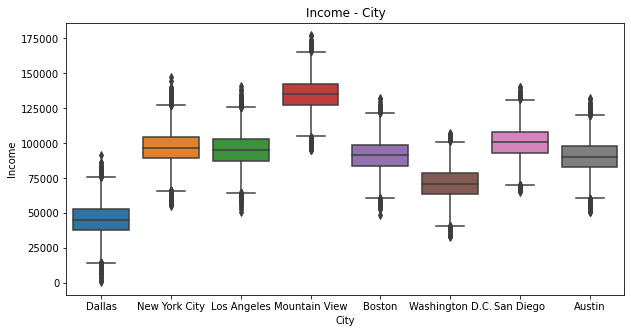

In [21]:
plt.title("Income - City")
sns.boxplot(x="City", y="Income", data=df);

Income and City are somewhat correlated, with strong distinction between Dallas and Mountain View income.

We can see exact correlation between all pairs of features

<AxesSubplot:>

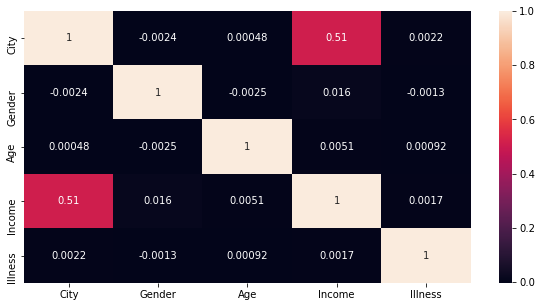

In [22]:
sns.heatmap(df.apply(lambda x: x.factorize()[0]).corr(), annot=True);

Only significant correlation seems to be between income and City.
<br>
<br>
<br>
<br>
Lets calculate Z-scores for income to analyze outliers.

In [23]:
from scipy.stats import zscore

income_outliers = df["Income"][(np.abs(zscore(df["Income"])) > 3)]
income_outliers

40         16168.0
352        11926.0
387        11535.0
406         6733.0
628        13117.0
            ...   
114625    168743.0
114766    170289.0
114835    167606.0
115100    168440.0
115295    168918.0
Name: Income, Length: 146, dtype: float64

There are 146 income outliers outside of 3sigma range, which is ~0.1% of data. That kind of percentage is normal for Gauss distribution and those outliers aren't very extreme values so we won't remove them for training.
<br>
<br>
<br>
<br>
Okay, now that we have some perspective about our dataset, we can start preparing it for classification.
<br>
<br>


# Illness prediction

## Data preprocessing

We need to convert all columns to numeric values. Gender and Illness columns will be converted to binary values and Cities will be given categorical values.

In [24]:
df_encoded = df.copy()
df_encoded['Gender'] = (df_encoded['Gender'] == 'Female').astype(np.uint8)
df_encoded['Illness'] = (df_encoded['Illness'] == 'Yes').astype(np.uint8)
df_encoded = pd.get_dummies(df_encoded, columns=['City'], prefix='City')
df_encoded.head(15)

,Gender,Age,Income,Illness,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.
0,0,41,40367.0,0,0,0,1,0,0,0,0,0
1,0,54,45084.0,0,0,0,1,0,0,0,0,0
2,0,42,52483.0,0,0,0,1,0,0,0,0,0
3,0,40,40941.0,0,0,0,1,0,0,0,0,0
4,0,46,50289.0,0,0,0,1,0,0,0,0,0
5,1,36,50786.0,0,0,0,1,0,0,0,0,0
6,1,32,33155.0,0,0,0,1,0,0,0,0,0
7,0,39,30914.0,0,0,0,1,0,0,0,0,0
8,0,51,68667.0,0,0,0,1,0,0,0,0,0
9,1,30,50082.0,0,0,0,1,0,0,0,0,0


In [25]:
df_encoded.dtypes

Gender                    uint8
Age                       int64
Income                  float64
Illness                   uint8
City_Austin               uint8
City_Boston               uint8
City_Dallas               uint8
City_Los Angeles          uint8
City_Mountain View        uint8
City_New York City        uint8
City_San Diego            uint8
City_Washington D.C.      uint8
dtype: object

In [26]:
X = df_encoded.drop('Illness', axis=1)
y = df_encoded.Illness

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<br>
<br>
Age and especially Income have much higher values which could have bigger impact on training.
<br>
<br>
That is why we will normalize their values to interval [0, 1]

In [29]:
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None

In [30]:
X_train_norm = X_train.copy()
cols = ["Age", "Income"]
scaler = MinMaxScaler()

for c in cols:
    X_train_norm[c] = scaler.fit_transform(X_train_norm[[c]])
    X_test[c] = scaler.transform(X_test[[c]])
print('{} {} {} {}'.format(X_train_norm.Income.describe(), X_train_norm.Age.describe(), X_test.Income.describe(), X_test.Age.describe()))

count    119999.000000
mean          0.513700
std           0.141624
min           0.000000
25%           0.454724
50%           0.527289
75%           0.588844
max           1.000000
Name: Income, dtype: float64 count    119999.000000
mean          0.498910
std           0.289286
min           0.000000
25%           0.250000
50%           0.500000
75%           0.750000
max           1.000000
Name: Age, dtype: float64 count    30000.000000
mean         0.512678
std          0.141099
min          0.010704
25%          0.454502
50%          0.526357
75%          0.587754
max          0.961104
Name: Income, dtype: float64 count    30000.000000
mean         0.498140
std          0.289426
min          0.000000
25%          0.250000
50%          0.500000
75%          0.750000
max          1.000000
Name: Age, dtype: float64


Lastly, we need to solve the imbalanced data issue. For that matter we will use SMOTETomek resampling method from imblearn on training data. It is a smarter resampling method that combines over- and under-sampling methods using SMOTE and Tomek links.

In [31]:
from imblearn.combine import SMOTETomek

In [32]:
X_resampled, y_resampled = SMOTETomek(random_state=1).fit_resample(X_train_norm, y_train)

## Model training and evaluation

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

<br>
<br>
First, we implement function that calculates and prints main metrics for classification evaluation.

In [34]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    data= [
        (X_train, y_train, 'Train'),
        (X_test, y_test, 'Test')
    ]
    
    for d in data:
        prediction = model.predict(d[0])
        prediction_proba = model.predict_proba(d[0])
        print("*" * 60)
        print("{} Classification report:\n {}".format(d[2], classification_report(d[1], prediction)))
        print("*" * 60)
        print("{} Confusion Matrix:\n {}".format(d[2], confusion_matrix(d[1], prediction)))
        print("*" * 60)
        print("{} AUC score:\n {}".format(d[2], roc_auc_score(d[1], prediction_proba[:, 1])))
        print("*" * 60)

<br>
<br>
<br>
We will try training our data with several algorithms. Every algorithm will be used in combination with GridSearchCV function, which searches for best parameter combinations in a given dictionary with help of cross validation. We will use F1 score (known as Dice coefficient) for performance evaluation as accuracy is not very useful predictor because of data imbalance. Because it tries every parameter combination and uses cross validation on top of that, GridSearchCV function can be very computationaly expensive. That is why we will limit the search and use only small number of parameter combinations.

## Logistic Regression

In [35]:
parameters = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'saga'],
    'random_state': [1]
}

model = GridSearchCV(LogisticRegression(), parameters, scoring='f1')
model.fit(X_resampled, y_resampled)
print("Best parameters: {}".format(model.best_params_))
evaluate_model(model, X_resampled, X_test, y_resampled, y_test)

D:\Users\Sime\Develop\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Best parameters: {'C': 1, 'random_state': 1, 'solver': 'lbfgs'}
************************************************************
Train Classification report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     88532
           1       0.50      0.46      0.48     88532

    accuracy                           0.50    177064
   macro avg       0.50      0.50      0.50    177064
weighted avg       0.50      0.50      0.50    177064

************************************************************
Train Confusion Matrix:
 [[48044 40488]
 [47528 41004]]
************************************************************
Train AUC score:
 0.5053252329697623
************************************************************
************************************************************
Test Classification report:
               precision    recall  f1-score   support

           0       0.92      0.56      0.69     27559
           1       0.08      0.44      0.14

## K Nearest Neighbors

In [36]:
parameters = {
    'n_neighbors': [5, 10],
    'weights': ['uniform', 'distance']
}

model = GridSearchCV(KNeighborsClassifier(), parameters, scoring='f1')
model.fit(X_resampled, y_resampled)
best_params = model.best_params_
print("Best parameters: {}".format(best_params))
evaluate_model(model, X_resampled, X_test, y_resampled, y_test)

Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
************************************************************
Train Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88532
           1       1.00      1.00      1.00     88532

    accuracy                           1.00    177064
   macro avg       1.00      1.00      1.00    177064
weighted avg       1.00      1.00      1.00    177064

************************************************************
Train Confusion Matrix:
 [[88532     0]
 [   72 88460]]
************************************************************
Train AUC score:
 0.9999996692360159
************************************************************
************************************************************
Test Classification report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79     27559
           1       0.08      0.30      0.13     

## Neural network

In [37]:
parameters = {
    'hidden_layer_sizes': [(5,), (100,)],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'random_state': [1]
}

model = GridSearchCV(MLPClassifier(), parameters, scoring='f1')
model.fit(X_resampled, y_resampled)
best_params = model.best_params_
print("Best parameters: {}".format(best_params))
evaluate_model(model, X_resampled, X_test, y_resampled, y_test)

Best parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'random_state': 1}
************************************************************
Train Classification report:
               precision    recall  f1-score   support

           0       0.55      0.41      0.47     88532
           1       0.53      0.66      0.59     88532

    accuracy                           0.54    177064
   macro avg       0.54      0.54      0.53    177064
weighted avg       0.54      0.54      0.53    177064

************************************************************
Train Confusion Matrix:
 [[36533 51999]
 [29839 58693]]
************************************************************
Train AUC score:
 0.5553281971253992
************************************************************
************************************************************
Test Classification report:
               precision    recall  f1-score   support

           0       0.91      0.39      0.55     

## Random forest

In [38]:
parameters = {
    'n_estimators': [10, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3],
    'random_state': [1]
}

model = GridSearchCV(RandomForestClassifier(), parameters, scoring='f1')
model.fit(X_resampled, y_resampled)
best_params = model.best_params_
print("Best parameters: {}".format(best_params))
evaluate_model(model, X_resampled, X_test, y_resampled, y_test)

Best parameters: {'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 1}
************************************************************
Train Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88532
           1       1.00      1.00      1.00     88532

    accuracy                           1.00    177064
   macro avg       1.00      1.00      1.00    177064
weighted avg       1.00      1.00      1.00    177064

************************************************************
Train Confusion Matrix:
 [[88477    55]
 [   29 88503]]
************************************************************
Train AUC score:
 0.9999975585981805
************************************************************
************************************************************
Test Classification report:
               precision    recall  f1-score   support

           0       0.92      0.70      0.79     27559
 

Random forest classifier implementation gives us option to check which features(columns) had the highest impact on model training. So, lets check that out.

(-1.0, 11.0)

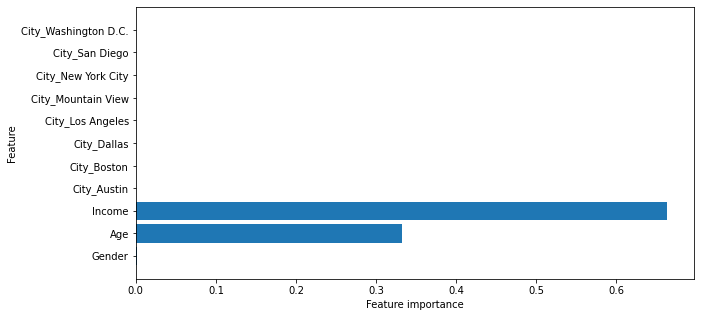

In [39]:
rfc = RandomForestClassifier(**best_params)
rfc.fit(X_resampled, y_resampled)
n_features = X_resampled.shape[1]
plt.barh(range(n_features), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_resampled.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

As we see, only Age and Income columns were relevant for our Random forest classifier training. We can try training our model with only those features.

In [40]:
rfc = RandomForestClassifier(**best_params)
cols = ["Age", "Income"]
rfc.fit(X_resampled[cols], y_resampled)
evaluate_model(rfc, X_resampled[cols], X_test[cols], y_resampled, y_test)

************************************************************
Train Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88532
           1       1.00      1.00      1.00     88532

    accuracy                           1.00    177064
   macro avg       1.00      1.00      1.00    177064
weighted avg       1.00      1.00      1.00    177064

************************************************************
Train Confusion Matrix:
 [[88369   163]
 [  167 88365]]
************************************************************
Train AUC score:
 0.999971753840234
************************************************************
************************************************************
Test Classification report:
               precision    recall  f1-score   support

           0       0.92      0.65      0.76     27559
           1       0.08      0.35      0.13      2441

    accuracy                           0.62     30000

We got a similar performance as with training on whole dataset. Finding importance of individual features is very useful because we can get simpler, faster models with lower feature dimensionality, that still give us comparable performance.

## Gradient boosting

For this method, we will use XGBClassifier implementation from xgboost library. It is superior in speed and performance to sklearn Gradient Boosting implementation.

In [41]:
parameters = {
    'min_child_weight': [1, 5],
    'gamma': [0.5, 1, 2],
    'subsample': [0.5, 1.0],
    'max_depth': [6, 15],
    'random_state': [1]
}

model = GridSearchCV(XGBClassifier(use_label_encoder=False, verbosity = 0), parameters, scoring='f1')
model.fit(X_resampled, y_resampled)
best_params = model.best_params_
print("Best parameters: {}".format(best_params))
evaluate_model(model, X_resampled, X_test, y_resampled, y_test)

Best parameters: {'gamma': 0.5, 'max_depth': 15, 'min_child_weight': 1, 'random_state': 1, 'subsample': 1.0}
************************************************************
Train Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     88532
           1       0.90      0.90      0.90     88532

    accuracy                           0.90    177064
   macro avg       0.90      0.90      0.90    177064
weighted avg       0.90      0.90      0.90    177064

************************************************************
Train Confusion Matrix:
 [[79915  8617]
 [ 9068 79464]]
************************************************************
Train AUC score:
 0.9668396800419304
************************************************************
************************************************************
Test Classification report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82     2755

(-1.0, 11.0)

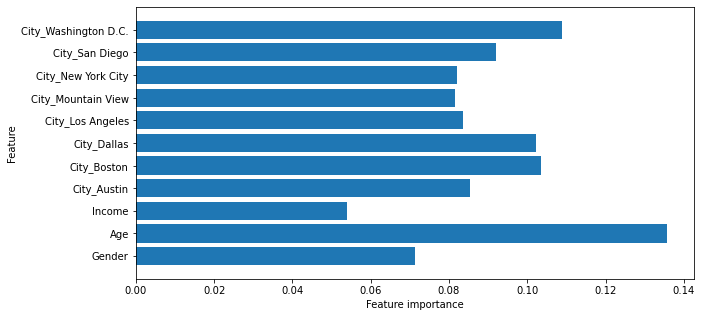

In [42]:
xgbc = XGBClassifier(verbosity = 0, use_label_encoder=False, **best_params)
xgbc.fit(X_resampled, y_resampled)
n_features = X_resampled.shape[1]
plt.barh(range(n_features), xgbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_resampled.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

As we can see, xgboost algorithm assigned very different importances to features than random forest classificator. It means that feature importances also depend on used algorithm.

# Conclusion

Some algorithms performed bad on both train and test data (Logistic Regression and Neural Networks), but we got very good results on train data with other algorithms (K Nearest Neighbors, Random Forest and XGBoost). The reasons why we couldn't get good results on test data could be because of overfitting (Not probable, because we trained every model with multiple parameter combinations and used cross validation for scoring the model. Furthermore, random forest and boosting algorithms are very resistant to overfitting). That leaves us the option that we either used wrong approach or Illness cannot be efficiently predicted by given features in toy_dataset.